In [1]:
import math
import itertools
import matplotlib.pyplot as plt

import numpy as np
from IPython.display import Audio

In [2]:
np.pi

3.141592653589793

(2389800,)


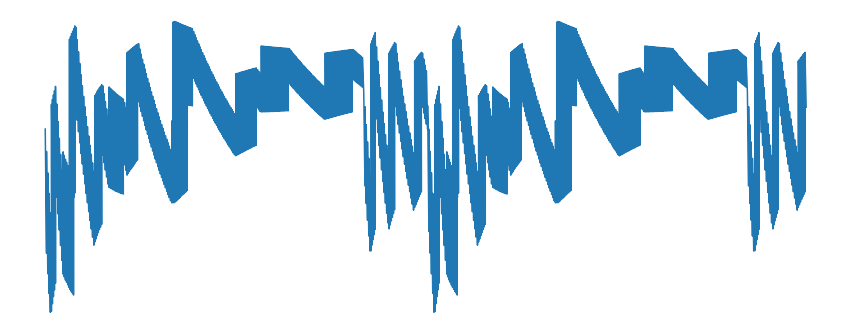

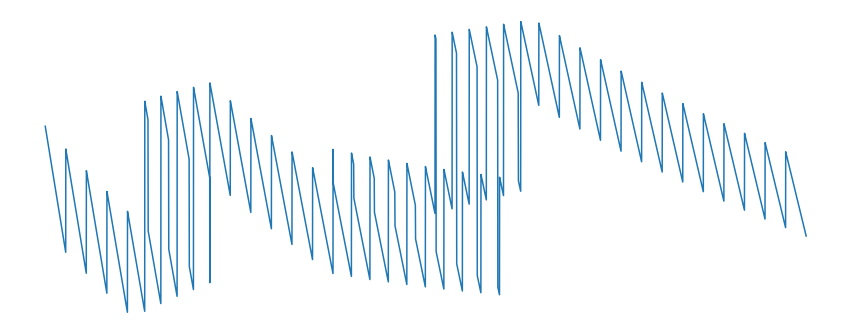

In [9]:
fs = 10

time = 1
n = 3
angle = 1
grade = 1

step = 0.005

def polar_polygon(x,n, angle, grade):
    pp = (1 / math.cos((2/n)*math.asin(math.sin((n/2)*x + angle))) ** grade) * math.sin(x) 
    return pp


def triangle(x, period, amplitude):
    
    r = (4*amplitude /period ) * abs(((x - amplitude / 4) % period**.2) - period / 2) - 2
    
    return r





samples_curves = []# = np.array([])

for angle in range(1,12000):
    
    i_gen = (triangle(i*.75, (angle%300+50)**.9, 200) for i in itertools.count(start=0, step=step))
    samples_curve_ = np.array([next(i_gen )for i in range(int(1 / step))])
    
    samples_curves.append(samples_curve_)
    
samples_curve = np.concatenate(samples_curves)
# samples_curve = samples_curve / samples_curve.max() * 1000

shift = 10000 
samples_curve = samples_curve / samples_curve.max() 
samples_curve = samples_curve[:-shift] + samples_curve[shift:]


figure = plt.figure(figsize=(15, 20))
plt.subplot(3, 1, 1)
plt.axis('off')
plt.plot(samples_curve[:119000])


figure = plt.figure(figsize=(15, 20))
plt.subplot(3, 1, 1)
plt.axis('off')
plt.plot(samples_curve[:7400])



print(samples_curve.shape)

Audio(samples_curve, rate=44100)

In [4]:
from scipy.io.wavfile import write

In [94]:

write("export/fz5.wav", 44100, samples_curve)

In [74]:
# samples_curve[:-1000] + samples_curve[1000:]

[1.         0.98974359 0.97948718 0.96923077]


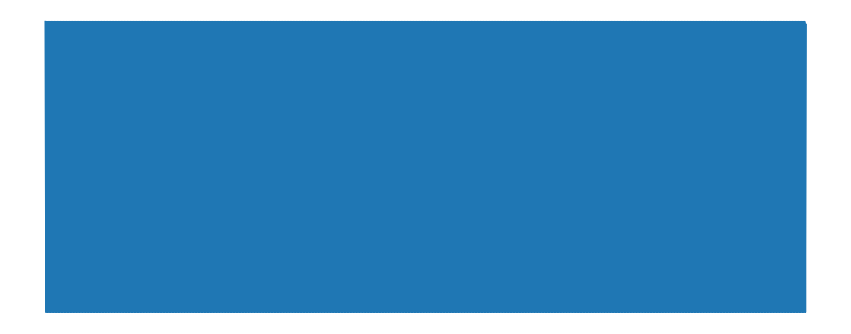

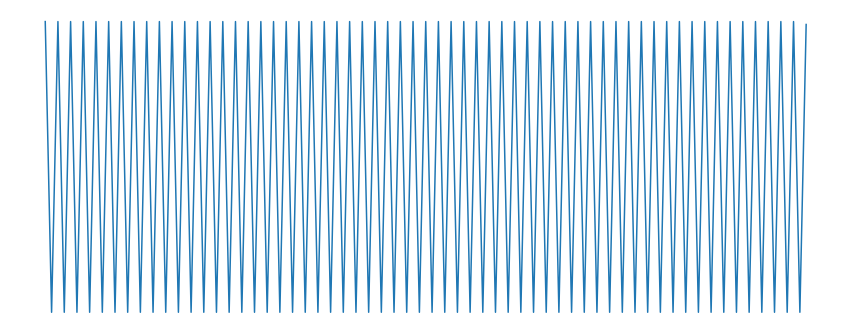

In [56]:
# A general “Polar Polygon” function is:
# PPn(x) = sec((2/n)·arcsin(sin((n/2)·x)))

fs = 44100

time = 30
n = 3
angle = 9
grade = 1

tone = 4400 / 3 # sine frequency, Hz, may be float


# def polar_polygon(x,n, angle, grade):
#     pp = 1 / math.cos((2/n)*math.asin(math.sin((n/2)*x + angle))) ** grade
#     return pp * math.sin(x) 

# i_gen = (polar_polygon(i,n,angle,grade) for i in itertools.count(start=0, step=.00004))

# samples_curve = np.array([next(i_gen ) for i in range(fs*time)])

samples_curve = samples_curve / samples_curve.max()
print(samples_curve[:4])
# samples_curve__ = (samples_curve / 2)
# samples_total = np.sin(samples_curve) 
samples_total = samples_curve
limit = 2400
figure = plt.figure(figsize=(15, 20))
plt.subplot(3, 1, 1)
plt.axis('off')
plt.plot(samples_curve[:limit*1000])

figure = plt.figure(figsize=(15, 20))
plt.subplot(3, 1, 1)
plt.axis('off')
plt.plot(samples_total[:limit*5])


Audio(samples_total, rate=fs)
# https://1ucasvb.tumblr.com/post/42906053623/in-a-previous-post-i-showed-how-to-geometrically

In [344]:
i_gen = (polar_polygon(i,n,angle,grade) for i in itertools.count(start=0, step=.00004))
samples_curve = np.array([next(i_gen ) for i in range(fs*time)])

# samples_curve = np.square(samples_curve)

samples_curve = samples_curve / samples_curve.max() * 1000
print(samples_curve[:4])

[0.        0.0214462 0.0428919 0.0643371]
